In [19]:
from warnings import filterwarnings
filterwarnings('ignore')

In [20]:
import numpy as np
import pandas as pd

In [21]:
df = pd.read_csv('OLIST.csv')
df1 = pd.read_csv('categorical_data.csv')

df2 = df.drop(['product_Computer_Office', 'product_Construction',
       'product_Cosmetics_accessories', 'product_Electronics',
       'product_Furniture', 'product_Health_Medicinies', 'product_Households',
       'product_Sports_Fashion'], axis = 1).set_index('customer_unique_id')
df2['Product'] = df1['product'].values
df2 = pd.get_dummies(df2, columns=['Product'])

In [22]:
olist = df2.copy()

In [23]:
olist.head()

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,Order_frequency,Class,Product_Computer_Office,Product_Construction,Product_Cosmetics_accessories,Product_Electronics,Product_Furniture,Product_Health_Medicinies,Product_Households,Product_Sports_Fashion
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
1,190.00,42.09,1.0,3.0,232.09,5,57.0,1430.0,8.0,4700.0,...,1,0,1,0,0,0,0,0,0,0
2,36.90,34.15,1.0,1.0,71.05,4,39.0,750.0,1.0,275.0,...,1,1,1,0,0,0,0,0,0,0
3,209.60,9.80,1.0,1.0,163.72,5,53.0,212.0,6.0,900.0,...,4,1,1,0,0,0,0,0,0,0
4,144.99,29.41,1.0,10.0,174.40,4,54.0,629.0,1.0,1050.0,...,1,1,1,0,0,0,0,0,0,0
5,59.00,15.29,1.0,3.0,74.29,5,54.0,257.0,5.0,200.0,...,1,0,1,0,0,0,0,0,0,0


In [29]:
olist.Delivery_befor_time[olist.Delivery_befor_time == olist.Delivery_befor_time.min()]

customer_unique_id
32327   -89.0
Name: Delivery_befor_time, dtype: float64

In [27]:
olist.drop([22103], axis = 0, inplace = True)

-----------------------

In [14]:
import matplotlib.pyplot as plt
import missingno as msno
msno.bar(olist)
plt.show()

<Figure size 2400x1000 with 3 Axes>

Not any null value exists.

-------------

In [28]:
x = olist[[ 'Product_Computer_Office', 'Product_Construction',
       'Product_Cosmetics_accessories', 'Product_Electronics',
       'Product_Furniture', 'Product_Health_Medicinies', 'Product_Households',
       'Product_Sports_Fashion', 'review_score', 'Class']]

y = olist[['price', 'freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'Product_volume',
       'order_status', 'Delivered_item_in_days',
       'Difference_between_estimated_Delivery_days', 'Quickness_in_approval_in_days',
       'Quickness_in_loading_in_days', 'payment_type',
       'Review_Answer_within_days', 'Delivery_befor_time', 'Order_frequency',
      ]]

In [8]:
#from sklearn.preprocessing import StandardScaler
#std = StandardScaler()
#std_y = std.fit_transform(y)
#Y = pd.DataFrame(std_y, columns = y.columns)
#Y.set_index(x.index,  inplace=True)

In [30]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range = (0,1))
std_y = minmax.fit_transform(y)
Y = pd.DataFrame(std_y, columns = y.columns)
Y.set_index(x.index,  inplace=True)

In [31]:
Y.shape, x.shape

((114069, 19), (114069, 10))

In [32]:
data = pd.concat((Y,x), axis = 1)

In [33]:
data = data[~data.index.duplicated(keep='first')]

In [34]:
data.shape

(92080, 29)

In [35]:
data.to_csv('olist_ML')

In [36]:
data.isna().sum().sum()

0

----------

Data is ready, let us work on modeling:

In [15]:
data.head(3)

,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,Product_volume,...,Product_Computer_Office,Product_Construction,Product_Cosmetics_accessories,Product_Electronics,Product_Furniture,Product_Health_Medicinies,Product_Households,Product_Sports_Fashion,review_score,Class
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
1,0.007742,0.040251,0.0,0.041667,0.008884,0.718310,0.042377,0.000000,0.023995,0.001024,...,1,0,0,0,0,0,0,0,4,1
2,0.007958,0.032855,0.0,0.416667,0.009859,0.760563,0.084504,0.052632,0.043290,0.018597,...,1,0,0,0,0,0,0,0,5,0
3,0.007370,0.036638,0.0,0.250000,0.008410,0.746479,0.094534,0.052632,0.039579,0.003202,...,1,0,0,0,0,0,0,0,4,0


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,92081.0,0.011010,0.018255,0.000000,0.003575,0.006626,0.011835,1.00
freight_value,92081.0,0.049359,0.038781,0.000000,0.032586,0.040056,0.051943,1.00
payment_sequential,92081.0,0.000905,0.008936,0.000000,0.000000,0.000000,0.000000,0.72
payment_installments,92081.0,0.120973,0.112428,0.000000,0.041667,0.083333,0.166667,1.00
payment_value,92081.0,0.011565,0.015990,0.000000,0.004398,0.007558,0.012832,1.00
product_name_lenght,92081.0,0.617917,0.140556,0.000000,0.535211,0.661972,0.732394,1.00
product_description_lenght,92081.0,0.198371,0.163994,0.000000,0.086760,0.151705,0.249498,1.00
product_photos_qty,92081.0,0.066155,0.092132,0.000000,0.000000,0.052632,0.105263,1.00
product_weight_g,92081.0,0.052193,0.093123,0.000000,0.007421,0.017316,0.045145,1.00
Product_volume,92081.0,0.005388,0.010931,0.000000,0.000823,0.002185,0.005949,1.00


In [38]:
X = data.drop('Class', axis = 1)
y = data.Class

from sklearn.model_selection import train_test_split as splt
Xtrain, Xtest, ytrain, ytest = splt(X,y, stratify = y)

In [39]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(69060, 28)
(69060,)
(23020, 28)
(23020,)


Let us begine with the basic model of `supervised linear regression`.

## Logistic Regression

In [40]:
import statsmodels.api as sm

lr_reg = sm.Logit(ytrain, Xtrain).fit()

lr_reg.summary()

         Current function value: 0.645485
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                69060
Model:                          Logit   Df Residuals:                    69032
Method:                           MLE   Df Model:                           27
Date:                Thu, 22 Apr 2021   Pseudo R-squ.:                 0.04840
Time:                        14:47:45   Log-Likelihood:                -44577.
converged:                      False   LL-Null:                       -46844.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
price                                          3.1544      1.188      2.655      0.008       0.826       5.483
freight_value                                -11.7166      0.351    -33.341      0.000     -12.405     -11.028
payment_sequential                             5.0310      1.295      3.886      0.000       2.494       7.568
payment_installments                           0.7963      0.080      9.973      0.000       0.640       0.953
payment_value                                 -3.1072      1.339     -2.321      0.020      -5.731      -0.483
product_name_lenght                           -0.2211      0.058     -3.819      0.000      -0.335      -0.108
product_description_lenght                    -0.3624      0.050     -7.256      0.000      -0.460      -0.264
product_photos_qty                             0.5396      0.089      6.088      0.000       0.366       0.713
product_weight_g                               2.1150      0.150     14.087      0.000       1.821       2.409
Product_volume                                11.2984      1.448      7.804      0.000       8.461      14.136
order_status                                 -49.0029   6.19e+05  -7.92e-05      1.000   -1.21e+06    1.21e+06
Delivered_item_in_days                        29.0703      0.769     37.819      0.000      27.564      30.577
Difference_between_estimated_Delivery_days     3.0156      0.182     16.536      0.000       2.658       3.373
Quickness_in_approval_in_days                 -0.2169      0.306     -0.710      0.478      -0.816       0.382
Quickness_in_loading_in_days                  -1.5258      0.328     -4.646      0.000      -2.170      -0.882
payment_type                                  -0.4361      0.056     -7.837      0.000      -0.545      -0.327
Review_Answer_within_days                      4.1424      0.634      6.537      0.000       2.900       5.384
Delivery_befor_time                          -26.6882      1.060    -25.166      0.000     -28.767     -24.610
Order_frequency                               -0.8993      0.973     -0.924      0.356      -2.807       1.008
Product_Computer_Office                       56.3671   6.19e+05   9.11e-05      1.000   -1.21e+06    1.21e+06
Product_Construction                          56.4422   6.19e+05   9.12e-05      1.000   -1.21e+06    1.21e+06
Product_Cosmetics_accessories                 56.3502   6.19e+05    9.1e-05      1.000   -1.21e+06    1.21e+06
Product_Electronics                           56.4796   6.19e+05   9.12e-05      1.000   -1.21e+06    1.21e+06
Product_Furniture                             56.3595   6.19e+05   9.11e-05      1.000   -1.21e+06    1.21e+06
Product_Health_Medicinies                     56.3564   6.19e+05    9.1e-05      1.000   -1.21e+06    1.21e+06
Product_Households                            56.3743   6.19e+05   9.11e-05      1.000   -1.21e+06    1.21e+06
Product_Sports_Fashion

In [20]:
a = pd.DataFrame()
a['Features'] = lr_reg.pvalues[lr_reg.pvalues<0.05].index
a['pvalue'] = lr_reg.pvalues[lr_reg.pvalues<0.05].values
a

,Features,pvalue
0,price,1.417737e-03
1,freight_value,1.231279e-248
2,payment_sequential,8.848677e-07
3,payment_installments,3.987046e-21
4,payment_value,5.985531e-03
5,product_name_lenght,1.348394e-04
6,product_description_lenght,5.547459e-12
7,product_photos_qty,1.449980e-08
8,product_weight_g,7.314148e-46
9,Product_volume,5.879960e-16


In [21]:
b = pd.DataFrame()
b['Features'] = lr_reg.pvalues[lr_reg.pvalues>0.05].index
b['pvalue'] = lr_reg.pvalues[lr_reg.pvalues>0.05].values
b

,Features,pvalue
0,order_status,0.999982
1,Quickness_in_approval_in_days,0.212494
2,Product_Computer_Office,0.999919
3,Product_Construction,0.999919
4,Product_Cosmetics_accessories,0.999919
5,Product_Electronics,0.999919
6,Product_Furniture,0.999919
7,Product_Health_Medicinies,0.999919
8,Product_Households,0.999919
9,Product_Sports_Fashion,0.999919


In [22]:
a.shape, b.shape

((18, 2), (10, 2))

from all 30 features, it seems that, 20 features are contributing completely. Rest all are doing quite ahead. Let us make the observations with these both sects.

In [23]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

model1 = LR.fit(Xtrain, ytrain)
model1.score(Xtrain, ytrain)

0.6544454097885897

For the extracted features model performace:

In [24]:
X1 = data[a.Features.values]
y1 = data.Class

from sklearn.model_selection import train_test_split as splt
X1train, X1test, y1train, y1test = splt(X1,y1, stratify = y)

model2 = LR.fit(X1train, y1train)
model2.score(X1train, y1train)

0.6570518389805966

In [25]:
X2 = data[b.Features.values]
y2 = data.Class

from sklearn.model_selection import train_test_split as splt
X2train, X2test, y2train, y2test = splt(X2,y2, stratify = y)

model3 = LR.fit(X2train, y2train)
model3.score(X2train, y2train)

0.5857080799304952

We see `model2` seems a little better models than `model1` and `model3`, but still the accuracy is not that much okay for the goodness.

In [26]:
X = data.drop('Class', axis = 1)
y = data.Class

from sklearn.model_selection import train_test_split as splt
Xtrain, Xtest, ytrain, ytest = splt(X,y, stratify = y)

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(Xtrain, ytrain)


print(LR.score(Xtrain, ytrain))
print(LR.score(Xtest, ytest))

0.6523892267593397
0.6548803266582686


Train Test accuracy does not show the `overfitting` in the model.

Some other tuning for the data:

In [27]:
LR = LogisticRegression(solver = 'saga', max_iter = 200)

LR.fit(Xtrain, ytrain)

print('Accuracy for the train dataset:',LR.score(Xtrain, ytrain))
print('Accuracy for the test dataset:',LR.score(Xtest, ytest).round(3))

Accuracy for the train dataset: 0.6546626122212569
Accuracy for the test dataset: 0.656


### Feature Elimination:

In [101]:
from sklearn.feature_selection import RFE
rfe_model = RFE(estimator = LR, n_features_to_select= data.shape[1]-10)
rfe_model.fit(Xtrain, ytrain)
f = pd.Series(data = rfe_model.ranking_, index = Xtrain.columns)

In [104]:
f[f==1].index

Index(['price', 'freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'Product_volume',
       'order_status', 'Delivered_item_in_days',
       'Difference_between_estimated_Delivery_days',
       'Quickness_in_loading_in_days', 'payment_type',
       'Review_Answer_within_days', 'Delivery_befor_time', 'Order_frequency',
       'Product_Electronics'],
      dtype='object')

In [106]:
data_f = data[['price', 'freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'Product_volume',
       'order_status', 'Delivered_item_in_days',
       'Difference_between_estimated_Delivery_days',
       'Quickness_in_loading_in_days', 'payment_type',
       'Review_Answer_within_days', 'Delivery_befor_time', 'Order_frequency',
       'Product_Electronics']]

xtrain, xtest, Ytrain, Ytest = splt(data_f, y)

In [107]:
LR_f = LogisticRegression(solver = 'saga', max_iter = 200)

LR_f.fit(xtrain, Ytrain)

print('Accuracy for the train dataset:',LR_f.score(xtrain, Ytrain))
print('Accuracy for the test dataset:',LR_f.score(xtest, Ytest).round(3))

Accuracy for the train dataset: 0.6571097596293078
Accuracy for the test dataset: 0.657


### Not a big change.

Confusion Matrix

In [28]:
model = LR.fit(Xtrain, ytrain)
log_pred = model.predict(Xtest)

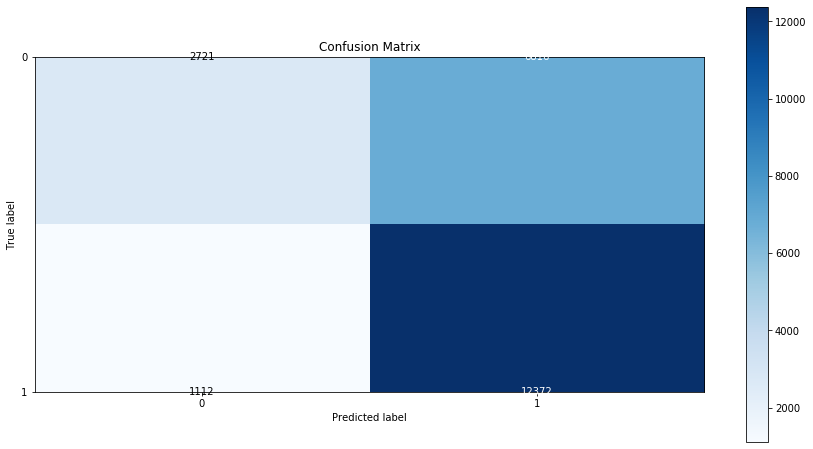

In [29]:
plt.rcParams['figure.figsize'] = [15,8]

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(ytest, log_pred)
plt.show()

----------

In [30]:
from sklearn.model_selection import cross_val_score, cross_val_predict
log_cross_val_score = cross_val_score(LR, Xtrain, ytrain, cv = 3)
log_cross_pred = cross_val_predict(LR, Xtest, ytest, cv = 3)

In [31]:
print(log_cross_val_score)

[0.6518245  0.65091225 0.64847958]


We can see, that a simpler logistic regression is giving the accuracy of `65%` till the end, hence we try something else. Let us work by `cross val prediction` so that we can have a good accuracy.

In [32]:
LR.score(Xtest, log_cross_pred)

0.9384040658529169

Here we got 94% of accuracy, which seems quite better.

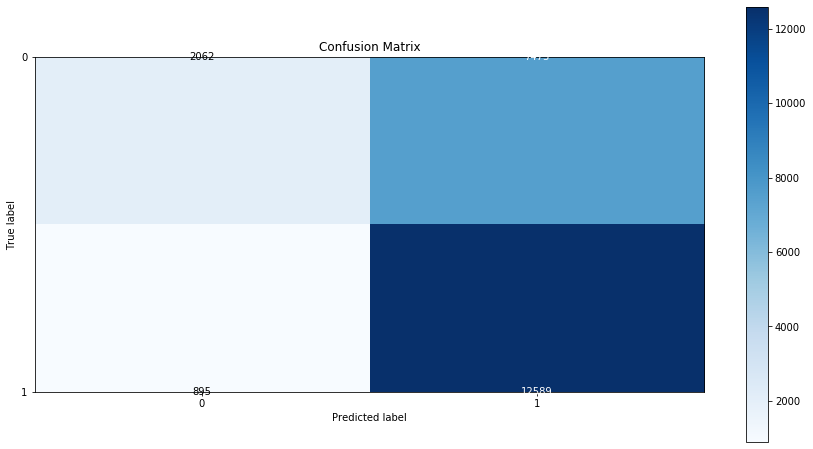

In [33]:
skplt.metrics.plot_confusion_matrix(ytest, log_cross_pred)
plt.show()

We see here some goodness in our work with k-fold technique.

### AUC_ROC Curve analysis:

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Simple LR model interpretations:')
print("Precision : ", precision_score(ytest, log_pred))
print("Recall : ", recall_score(ytest, log_pred))
print("F1 Score: ", f1_score(ytest, log_pred))
print()
print('Cross Validation model interpretations:')
print("Precision : ", precision_score(ytest, log_cross_pred))
print("Recall : ", recall_score(ytest, log_cross_pred))
print("F1 Score: ", f1_score(ytest, log_cross_pred))

Simple LR model interpretations:
Precision :  0.6447779862414009
Recall :  0.9175318896469891
F1 Score:  0.7573457394711067

Cross Validation model interpretations:
Precision :  0.6274421850079744
Recall :  0.9336250370809849
F1 Score:  0.7505067366161917


Model gave 64% scor for True postive rate from the class of the data, where 36% model misclassified. And 91% of the positive labels were predicted true out of actual positive labels, which seems better. Indeed we wish to have high precision and high recall, but our model is giving the accuracy around 94%. But circumstances do not allow to get both high, hence we go for harmonic value with respect to precision and recall. And here 75% score shows a quite good value for both precision and recall. 

##### Why harmonic means?
The reason is harmonic mean changes by precision and recall. Change in anyone of them can make f1-score changes. 

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
print('ROC_AUC Score:',roc_auc_score(ytest, log_pred))

ROC_AUC Score: 0.6014208677552341


### AUC-ROC curve

ROC_AUC_Score: 0.6014208677552341
ROC_AUC_Score: 0.5749177927357321


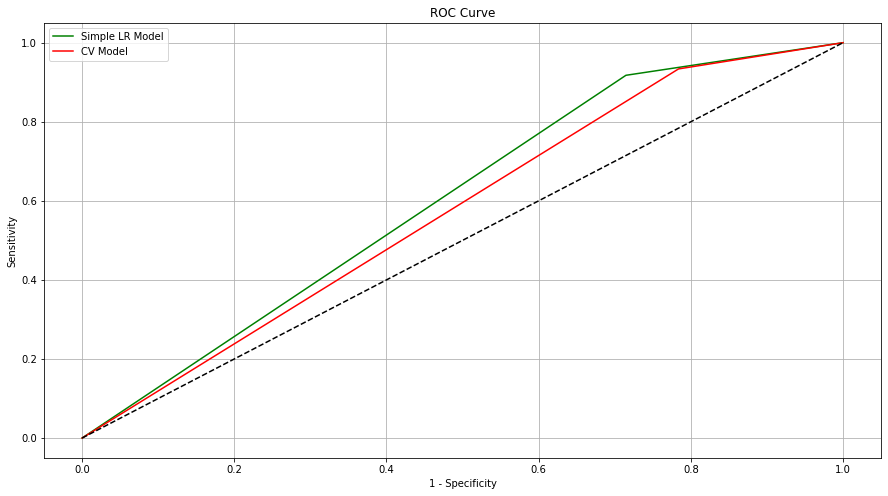

In [36]:
fpr, tpr, th = roc_curve(ytest, log_pred)
fpr1, tpr1, th1 = roc_curve(ytest, log_cross_pred)

print('ROC_AUC_Score:',roc_auc_score(ytest, log_pred))
plt.plot(fpr, tpr, c = 'g', label = 'Simple LR Model')

print('ROC_AUC_Score:',roc_auc_score(ytest, log_cross_pred))
plt.plot(fpr1, tpr1, 'r', label = 'CV Model')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.grid()
plt.legend()
plt.show()

More eventually we are not getting satisfied with this model. We should go for some thing probablistic model.

## Naive Bayes 

In [37]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(Xtrain, ytrain)
print('Accuracy for train data:',nb.score(Xtrain, ytrain))
print('Accuracy for test data:',nb.score(Xtest, ytest))

Accuracy for train data: 0.4304807413843035
Accuracy for test data: 0.42843490725858996


This seems very hard for Naive Bayes that we are not getting a good satisfied result from the morning.

In [38]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(nb, Xtrain, ytrain, cv = 3)
cvs

array([0.42997394, 0.4301477 , 0.43236316])

In [39]:
print('Average Accuracy:',cvs.mean())

Average Accuracy: 0.4308282652765711


Let us see the classification report:

In [40]:
from sklearn.metrics import classification_report

print('Classification Report for Train set of data:')
print(classification_report(ytrain, nb.predict(Xtrain)))
print()
print('Classification Report for Test set of data:')
print(classification_report(ytest, nb.predict(Xtest)))

Classification Report for Train set of data:
              precision    recall  f1-score   support

           0       0.42      0.96      0.58     28611
           1       0.67      0.06      0.10     40449

    accuracy                           0.43     69060
   macro avg       0.54      0.51      0.34     69060
weighted avg       0.56      0.43      0.30     69060


Classification Report for Test set of data:
              precision    recall  f1-score   support

           0       0.42      0.96      0.58      9537
           1       0.65      0.05      0.10     13484

    accuracy                           0.43     23021
   macro avg       0.53      0.51      0.34     23021
weighted avg       0.55      0.43      0.30     23021



Still after k-fold technique we see the same performnace of the model. Let us go for other determinstic models.

## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(Xtrain, ytrain)

In [42]:
print('Accuracy on train data:',dt.score(Xtrain, ytrain))
print('Accuracy on test data:',dt.score(Xtest, ytest))

Accuracy on train data: 1.0
Accuracy on test data: 0.8132574605794709


In [43]:
dt_pred = dt_model.predict(Xtest)

ROC_AUC_Score: 0.6014208677552341
ROC_AUC_Score: 0.5749177927357321
ROC_AUC_Score: 0.8081465496822055


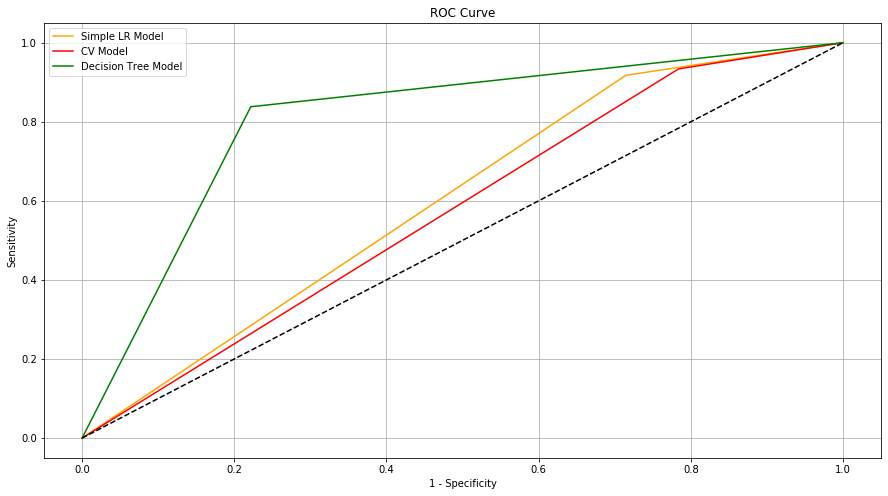

In [44]:
fpr, tpr, th = roc_curve(ytest, log_pred)
fpr1, tpr1, th1 = roc_curve(ytest, log_cross_pred)
fpr2, tpr2, th2 = roc_curve(ytest, dt_pred)

print('ROC_AUC_Score:',roc_auc_score(ytest, log_pred))
plt.plot(fpr, tpr, c = 'orange', label = 'Simple LR Model')

print('ROC_AUC_Score:',roc_auc_score(ytest, log_cross_pred))
plt.plot(fpr1, tpr1, 'r', label = 'CV Model')

print('ROC_AUC_Score:',roc_auc_score(ytest, dt_pred))
plt.plot(fpr2, tpr2, c = 'g', label = 'Decision Tree Model')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.grid()
plt.legend()
plt.show()

We see that decision tree is giving the good accuracy. 

We know that `Overfitting` is a significant practical difficulty for decision tree models.

But for test set of data we got a good accuracy for it.

In [45]:
from sklearn.metrics import classification_report

print('Classification Report for Train set of data:')
print(classification_report(ytrain, dt.predict(Xtrain)))
print()
print('Classification Report for Test set of data:')
print(classification_report(ytest, dt.predict(Xtest)))

Classification Report for Train set of data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28611
           1       1.00      1.00      1.00     40449

    accuracy                           1.00     69060
   macro avg       1.00      1.00      1.00     69060
weighted avg       1.00      1.00      1.00     69060


Classification Report for Test set of data:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      9537
           1       0.84      0.84      0.84     13484

    accuracy                           0.81     23021
   macro avg       0.81      0.81      0.81     23021
weighted avg       0.81      0.81      0.81     23021



Since we get the good scores for all metrices, but the issue of natural `overfitting` comes again in the picture.

Let us tune the decision tree model

In [46]:
tune = {'criterion': ['entropy', 'gini'],
       'max_depth':range(2,10)}

from sklearn.model_selection import GridSearchCV
grid_selection = GridSearchCV(estimator = dt, param_grid = tune, cv = 3)
grid_dt_model = grid_selection.fit(Xtrain, ytrain)
print('Best parameters for the model are:', grid_dt_model.best_params_)

Best parameters for the model are: {'criterion': 'gini', 'max_depth': 9}


In [47]:
dt_grid = DecisionTreeClassifier(criterion = 'gini', max_depth = 9)
dt_grid.fit(Xtrain, ytrain)

print('Accuracy on train data:',dt_grid.score(Xtrain, ytrain))
print('Accuracy on test data:',dt_grid.score(Xtest, ytest))

Accuracy on train data: 0.8076889661164205
Accuracy on test data: 0.7924938099995656


Let us take a look on classification report as well:

In [48]:
print('Classification reports for Train data:')
print(classification_report(ytrain, dt_grid.predict(Xtrain)))
print()
print('Classification report for Test data:')
print(classification_report(ytest, dt_grid.predict(Xtest)))

Classification reports for Train data:
              precision    recall  f1-score   support

           0       0.84      0.67      0.74     28611
           1       0.79      0.91      0.85     40449

    accuracy                           0.81     69060
   macro avg       0.82      0.79      0.79     69060
weighted avg       0.81      0.81      0.80     69060


Classification report for Test data:
              precision    recall  f1-score   support

           0       0.81      0.65      0.72      9537
           1       0.78      0.89      0.83     13484

    accuracy                           0.79     23021
   macro avg       0.80      0.77      0.78     23021
weighted avg       0.80      0.79      0.79     23021



As we were facing overfitting in above situation, but here we do not see any heavy overfitting, even we see 79-80% of the f1-core all around seems better.

What does the tree tells about?

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.61169 to fit



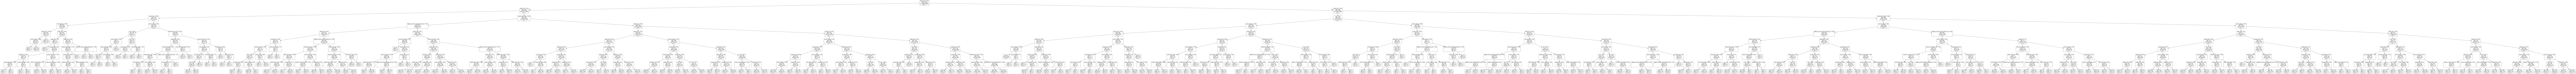

In [49]:
import pydotplus
from IPython.display import Image  
from sklearn import tree

labels = Xtrain.columns

dot_data = tree.export_graphviz(dt_grid, feature_names = labels, class_names = ["0","1"])  

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

We see this observation, so that we are not going to deal with clear plot for tree glance.

Let us do something with a method **KNN**.

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [51]:
print('Accuracy on train data:',knn.score(Xtrain, ytrain))
print('Accuracy on test data:',knn.score(Xtest, ytest))

Accuracy on train data: 0.7402548508543295
Accuracy on test data: 0.5992789192476434


We see a little overfitting in the model.

It possible to do tuning for the KNN model, but since the data is quite larger, it will definiely take a lot of time to get excuted. Hence we believe to get ahead with some other models.

Let us head to the `Ensemble` technique to get the best predictions:

## Stacking

In [52]:
from sklearn.ensemble import VotingClassifier
LR1 = LogisticRegression(solver = 'saga', max_iter = 200)
nb1 = GaussianNB()
dt1 = DecisionTreeClassifier(criterion = grid_dt_model.best_params_.get('criterion'),
                                  max_depth = grid_dt_model.best_params_.get('max_depth'))

In [53]:
st_vot = VotingClassifier([('Logistic Regression',LR1), 
                           ('Naive Bayes',nb1), 
                           ('Decision Tree',dt1)])

In [54]:
print('Accuracy with Train data for the model:',st_vot.fit(Xtrain, ytrain).score(Xtrain, ytrain))
print()
print('Accuracy with Train data for the model:',st_vot.fit(Xtrain, ytrain).score(Xtest, ytest))

Accuracy with Train data for the model: 0.7889516362583261

Accuracy with Train data for the model: 0.7777681247556579


In [55]:
vot_pred = st_vot.fit(Xtrain, ytrain).predict(Xtest)

ROC_AUC_Score: 0.6014208677552341
ROC_AUC_Score: 0.5749177927357321
ROC_AUC_Score: 0.8081465496822055
ROC_AUC_Score: 0.7641534351665751


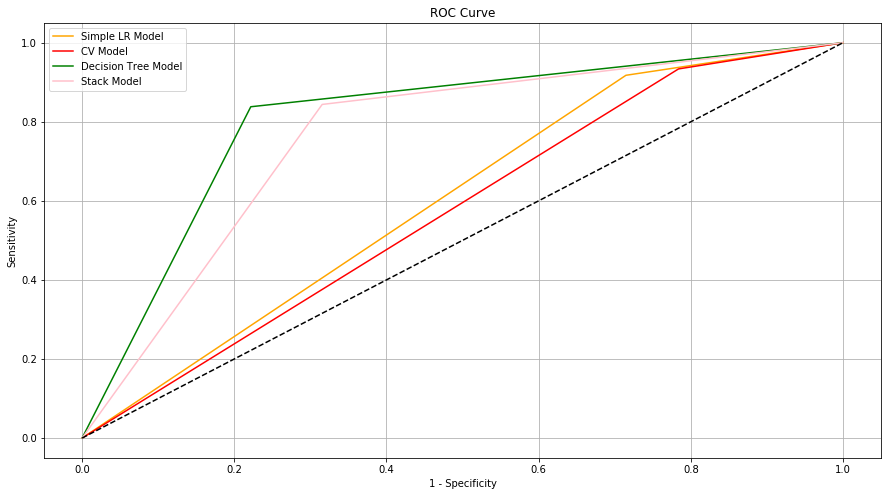

In [56]:
fpr, tpr, th = roc_curve(ytest, log_pred)
fpr1, tpr1, th1 = roc_curve(ytest, log_cross_pred)
fpr2, tpr2, th2 = roc_curve(ytest, dt_pred)
fpr3, tpr3, th3 = roc_curve(ytest, vot_pred)

print('ROC_AUC_Score:',roc_auc_score(ytest, log_pred))
plt.plot(fpr, tpr, c = 'orange', label = 'Simple LR Model')

print('ROC_AUC_Score:',roc_auc_score(ytest, log_cross_pred))
plt.plot(fpr1, tpr1, 'r', label = 'CV Model')

print('ROC_AUC_Score:',roc_auc_score(ytest, dt_pred))
plt.plot(fpr2, tpr2, c = 'g', label = 'Decision Tree Model')

print('ROC_AUC_Score:',roc_auc_score(ytest, vot_pred))
plt.plot(fpr3, tpr3, c = 'pink', label = 'Stack Model')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.grid()
plt.legend()
plt.show()

In [57]:
print('Classification reports for Train data:')
print(classification_report(ytrain, st_vot.fit(Xtrain, ytrain).predict(Xtrain)))
print()
print('Classification report for Test data:')
print(classification_report(ytest, vot_pred))

Classification reports for Train data:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73     28611
           1       0.80      0.85      0.83     40449

    accuracy                           0.79     69060
   macro avg       0.79      0.78      0.78     69060
weighted avg       0.79      0.79      0.79     69060


Classification report for Test data:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      9537
           1       0.79      0.84      0.82     13484

    accuracy                           0.78     23021
   macro avg       0.77      0.76      0.77     23021
weighted avg       0.78      0.78      0.78     23021



From the plot and classification report we can mention that, at least this model is quite better than that of `Logistic Regression` and `Naive Bayes`. Even precision and recall gives the idea of good insights.

Time consuming...
## Bagging: BootStrap Aggregation

In [58]:
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(base_estimator = dt1)
bagg.fit(Xtrain, ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=9))

In [59]:
print('Accuracy for the train data:',bagg.score(Xtrain, ytrain))
print('Accuracy for the test data:',bagg.score(Xtest, ytest))

Accuracy for the train data: 0.8256733275412684
Accuracy for the test data: 0.8093045480213718


Let us take some inferences from the classification report:

In [60]:
print('Classification reports for Train data:')
print(classification_report(ytrain, bagg.fit(Xtrain, ytrain).predict(Xtrain)))
print()
print('Classification report for Test data:')
print(classification_report(ytest, bagg.fit(Xtrain, ytrain).predict(Xtest)))

Classification reports for Train data:
              precision    recall  f1-score   support

           0       0.87      0.69      0.77     28611
           1       0.81      0.93      0.86     40449

    accuracy                           0.83     69060
   macro avg       0.84      0.81      0.82     69060
weighted avg       0.83      0.83      0.82     69060


Classification report for Test data:
              precision    recall  f1-score   support

           0       0.85      0.66      0.74      9537
           1       0.79      0.92      0.85     13484

    accuracy                           0.81     23021
   macro avg       0.82      0.79      0.80     23021
weighted avg       0.81      0.81      0.80     23021



Same situation we face here about the inference of the data.

## Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(Xtrain, ytrain)

RandomForestClassifier()

In [62]:
print('Accuracy for the train data:',rf.score(Xtrain, ytrain))
print('Accuracy for the test data:',rf.score(Xtest, ytest))

Accuracy for the train data: 1.0
Accuracy for the test data: 0.8219886190869207


We faced the same issue like decision tree a huge `Overfitting`, let us see whether tuning the model could make any changes.

In [63]:
tune1 = {'criterion': ['entropy', 'gini'],
       'max_depth':range(2,10)}

from sklearn.model_selection import GridSearchCV
grid_selections = GridSearchCV(estimator = rf, param_grid = tune1, cv = 3)
grid_rf_model = grid_selections.fit(Xtrain, ytrain)
print('Best parameters for the model are:', grid_rf_model.best_params_)

Best parameters for the model are: {'criterion': 'gini', 'max_depth': 9}


In [64]:
grid_rf = RandomForestClassifier(criterion = grid_rf_model.best_params_.get('criterion'),
                                 max_depth = grid_rf_model.best_params_.get('max_depth'))
grid_rf.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=9)

In [65]:
print('Accuracy for the train data:',grid_rf.score(Xtrain, ytrain))
print('Accuracy for the test data:',grid_rf.score(Xtest, ytest))

Accuracy for the train data: 0.7738777874312193
Accuracy for the test data: 0.7538334564093654


Just like `stack model` we see here the change is very minor, which means we should proceed with base model.  It was `overfitting` without tuning.

## Boosting
### Adaptive Boosting

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ad_boost = AdaBoostClassifier(base_estimator = dt1)
ad_boost.fit(Xtrain, ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9))

In [67]:
print('Accuracy for the train data:',ad_boost.score(Xtrain, ytrain))
print('Accuracy for the test data:',ad_boost.score(Xtest, ytest))

Accuracy for the train data: 0.998349261511729
Accuracy for the test data: 0.819251987315929


We got here one of the best model to accuracy. But even `Overfitting` is an issue. 

In [68]:
ada_pred = ad_boost.fit(Xtest, ytest).predict(Xtest)

LR model            : 0.6014208677552341
LR CV model         : 0.5749177927357321
Decision Tree model : 0.8081465496822055
Stack model         : 0.7641534351665751
Adaboost model      : 1.0


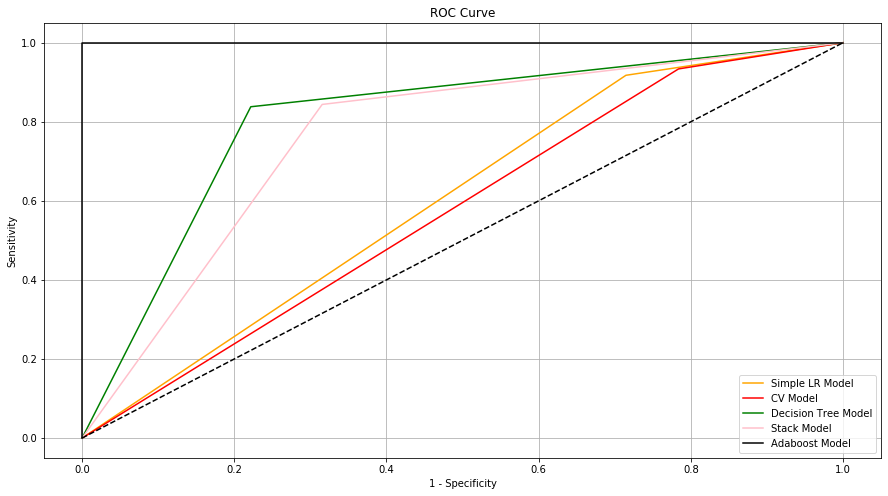

In [69]:
fpr, tpr, th = roc_curve(ytest, log_pred)
fpr1, tpr1, th1 = roc_curve(ytest, log_cross_pred)
fpr2, tpr2, th2 = roc_curve(ytest, dt_pred)
fpr3, tpr3, th3 = roc_curve(ytest, vot_pred)
fpr4, tpr4, th4 = roc_curve(ytest, ada_pred)

print('LR model            :',roc_auc_score(ytest, log_pred))
plt.plot(fpr, tpr, c = 'orange', label = 'Simple LR Model')

print('LR CV model         :',roc_auc_score(ytest, log_cross_pred))
plt.plot(fpr1, tpr1, 'r', label = 'CV Model')

print('Decision Tree model :',roc_auc_score(ytest, dt_pred))
plt.plot(fpr2, tpr2, c = 'g', label = 'Decision Tree Model')

print('Stack model         :',roc_auc_score(ytest, vot_pred))
plt.plot(fpr3, tpr3, c = 'pink', label = 'Stack Model')

print('Adaboost model      :',roc_auc_score(ytest, ada_pred))
plt.plot(fpr4, tpr4, c = 'black', label = 'Adaboost Model')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.grid()
plt.legend()
plt.show()

In [70]:
print('Classification reports for Train data:')
print(classification_report(ytrain, ad_boost.fit(Xtrain, ytrain).predict(Xtrain)))
print()
print('Classification report for Test data:')
print(classification_report(ytest, ad_boost.fit(Xtrain, ytrain).predict(Xtest)))

Classification reports for Train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28611
           1       1.00      1.00      1.00     40449

    accuracy                           1.00     69060
   macro avg       1.00      1.00      1.00     69060
weighted avg       1.00      1.00      1.00     69060


Classification report for Test data:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      9537
           1       0.83      0.85      0.84     13484

    accuracy                           0.81     23021
   macro avg       0.81      0.80      0.81     23021
weighted avg       0.81      0.81      0.81     23021



Plot shows again one of the option to go with. And the classificatio report again shows the scores of precision and recall and f1-score. But the result of classification report is astonishing.

### Gradient Boosting

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gr_boost = GradientBoostingClassifier()
gr_boost.fit(Xtrain, ytrain)

GradientBoostingClassifier()

In [72]:
print('Accuracy for the train data:',gr_boost.score(Xtrain, ytrain))
print('Accuracy for the test data:',gr_boost.score(Xtest, ytest))

Accuracy for the train data: 0.7882276281494353
Accuracy for the test data: 0.7826766865036271


With this model, again the same situation like previous model. As similar as `stack model`.

Tuning the model:

In [73]:
#tune2 = { 'loss' : ['deviance', 'exponential'],
#         'criterion': ['friedman_mse', 'mse', 'mae'],
 #      'learning_rate' : [0.1, 0.2, 0.3, 0.5, 0.001, 0.002, 0.003],
  #  'n_estimators': range(100,500,100),
   # 'subsample': [1.0, 2.0, 3.0]}

#from sklearn.model_selection import GridSearchCV
#grid_selections1 = GridSearchCV(estimator = gr_boost, param_grid = tune2, cv = 3)
#grid_gr_model = grid_selections1.fit(Xtrain, ytrain)
#print('Best parameters for the model are:', grid_gr_model.best_params_)

In [74]:
#grid_gr = GradientBoostingClassifier(criterion = grid_gr_model.best_params_.get('criterion'),
#                                 loss = grid_gr_model.best_params_.get('loss'),
 #                                   learning_rate = grid_gr_model.best_params_.get('learning_rate'),
  #                                  n_estimators = grid_gr_model.best_params_.get('n_estimators'),
   #                                 subsample = grid_gr_model.best_params_.get('subsample'))
#grid_gr.fit(Xtrain, ytrain)

In [75]:
#print('Accuracy for the train data:',grid_gr.score(Xtrain, ytrain))
#print('Accuracy for the test data:',grid_gr.score(Xtest, ytest))

### Extra Trees Classifier

In [76]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators = 20)
etc.fit(Xtrain, ytrain)

ExtraTreesClassifier(n_estimators=20)

In [77]:
print('Accuracy for the train data:',etc.score(Xtrain, ytrain))
print('Accuracy for the test data:',etc.score(Xtest, ytest))

Accuracy for the train data: 1.0
Accuracy for the test data: 0.7221667173450328


Again the issue of `overfitting`.

Let us tune this model as well:

In [78]:
tune2 = {'criterion': ['entropy', 'gini'],
       'max_depth':range(2,10)}

from sklearn.model_selection import GridSearchCV
grid_selections_ = GridSearchCV(estimator = etc, param_grid = tune2, cv = 3)
grid_etc_model = grid_selections_.fit(Xtrain, ytrain)
print('Best parameters for the model are:', grid_etc_model.best_params_)

Best parameters for the model are: {'criterion': 'gini', 'max_depth': 9}


In [79]:
grid_etc = ExtraTreesClassifier(bootstrap=True, n_estimators = 20, 
                                criterion = grid_etc_model.best_params_.get('criterion'),
                                  max_depth = grid_etc_model.best_params_.get('max_depth'))
grid_etc.fit(Xtrain, ytrain)

ExtraTreesClassifier(bootstrap=True, max_depth=9, n_estimators=20)

In [80]:
print('Accuracy for the train data:',grid_etc.score(Xtrain, ytrain))
print('Accuracy for the test data:',grid_etc.score(Xtest, ytest))

Accuracy for the train data: 0.597161888213148
Accuracy for the test data: 0.5939359715042787


Extra tree was uniquely fine, but after tuning model is falling down like `Logistic Regression`.

LR model                     : 0.6014208677552341
LR CV model                  : 0.5749177927357321
Decision Tree model          : 0.8081465496822055
Decision Tree model Tuned    : 0.771201753933306
Stack model                  : 0.7641534351665751
Bagging                      : 0.7896083901177469
Random Foret                 : 0.8078773519189124
Random Foret Tuned           : 0.7176639153719
Adaboost model               : 1.0
Gradient model               : 0.759712519682044
Extra Trees Classifier       : 0.6992541336996998
Extra Trees Classifier Tuned : 0.5100418277552988


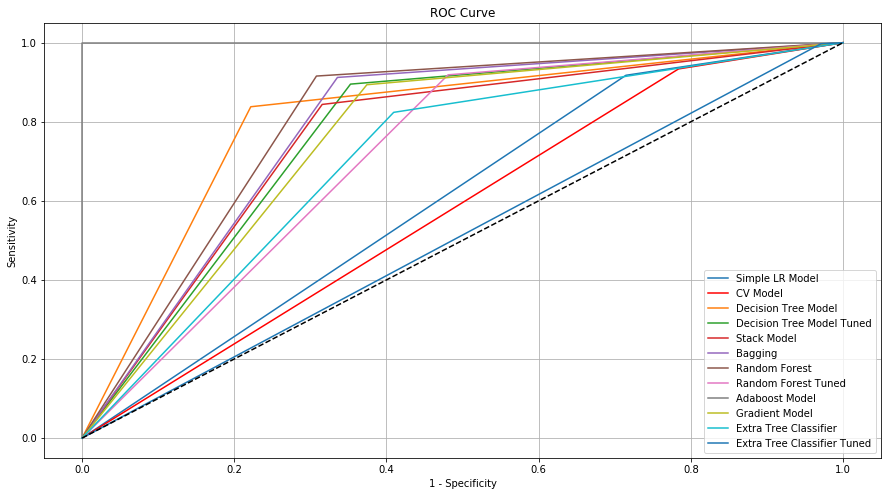

In [110]:
fpr, tpr, th = roc_curve(ytest, log_pred)
fpr1, tpr1, th1 = roc_curve(ytest, log_cross_pred)
fpr2, tpr2, th2 = roc_curve(ytest, dt_pred)
fpr22, tpr22, th22 = roc_curve(ytest, dt_grid.fit(Xtrain, ytrain).predict(Xtest))
fpr3, tpr3, th3 = roc_curve(ytest, vot_pred)
fpra, tpra, tha = roc_curve(ytest, bagg.fit(Xtrain, ytrain).predict(Xtest))
fprb, tprb, thb = roc_curve(ytest, rf.fit(Xtrain, ytrain).predict(Xtest))
fprb1, tprb1, thb1 = roc_curve(ytest, grid_rf.fit(Xtrain, ytrain).predict(Xtest))
fpr4, tpr4, th4 = roc_curve(ytest, ada_pred)
fpr5, tpr5, th5 = roc_curve(ytest, gr_boost.fit(Xtrain, ytrain).predict(Xtest))
fpr6, tpr6, th6 = roc_curve(ytest, etc.fit(Xtrain, ytrain).predict(Xtest))
fpr7, tpr7, th7 = roc_curve(ytest, grid_etc.fit(Xtrain, ytrain).predict(Xtest))

print('LR model                     :',roc_auc_score(ytest, log_pred))
plt.plot(fpr, tpr, label = 'Simple LR Model')

print('LR CV model                  :',roc_auc_score(ytest, log_cross_pred))
plt.plot(fpr1, tpr1, 'r', label = 'CV Model')

print('Decision Tree model          :',roc_auc_score(ytest, dt_pred))
plt.plot(fpr2, tpr2, label = 'Decision Tree Model')

print('Decision Tree model Tuned    :',roc_auc_score(ytest, dt_grid.fit(Xtrain, ytrain).predict(Xtest)))
plt.plot(fpr22, tpr22, label = 'Decision Tree Model Tuned')

print('Stack model                  :',roc_auc_score(ytest, vot_pred))
plt.plot(fpr3, tpr3, label = 'Stack Model')

print('Bagging                      :',roc_auc_score(ytest, bagg.fit(Xtrain, ytrain).predict(Xtest)))
plt.plot(fpra, tpra, label = 'Bagging')

print('Random Foret                 :',roc_auc_score(ytest, rf.fit(Xtrain, ytrain).predict(Xtest)))
plt.plot(fprb, tprb, label = 'Random Forest')

print('Random Foret Tuned           :',roc_auc_score(ytest, grid_rf.fit(Xtrain, ytrain).predict(Xtest)))
plt.plot(fprb1, tprb1, label = 'Random Forest Tuned')

print('Adaboost model               :',roc_auc_score(ytest, ada_pred))
plt.plot(fpr4, tpr4, label = 'Adaboost Model')

print('Gradient model               :',roc_auc_score(ytest, gr_boost.fit(Xtrain, ytrain).predict(Xtest)))
plt.plot(fpr5, tpr5, label = 'Gradient Model')

print('Extra Trees Classifier       :',roc_auc_score(ytest, etc.fit(Xtrain, ytrain).predict(Xtest)))
plt.plot(fpr6, tpr6, label = 'Extra Tree Classifier')

print('Extra Trees Classifier Tuned :',roc_auc_score(ytest, grid_etc.fit(Xtrain, ytrain).predict(Xtest)))
plt.plot(fpr7, tpr7, label = 'Extra Tree Classifier Tuned')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.grid()
plt.legend()
plt.show()

In [ ]:
LR model                     : 0.6014208677552341
LR CV model                  : 0.5749177927357321
Decision Tree model          : 0.8081465496822055
Decision Tree model Tuned    : 0.771201753933306
Stack model                  : 0.7641534351665751
Bagging                      : 0.7896083901177469
Random Foret                 : 0.8078773519189124
Random Foret Tuned           : 0.7176639153719
Adaboost model               : 1.0
Gradient model               : 0.759712519682044
Extra Trees Classifier       : 0.6992541336996998
Extra Trees Classifier Tuned : 0.5100418277552988

In [87]:
models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Decision Tree Tuned' , 'KNN', 'Stacking', 'Bagging',
          'Random Forest', 'Random Forest Tuned', 'Adaptive Boosting', 'Gradient Boosting',
          'Extra Trees', 'Extra Trees Tuned']
train = [0.6546626122212569, 0.4312771503040834, 1.0, 0.8064871126556618, 0.7399942079351288, 0.7886765131769475,
        0.8223718505647263, 1.0, 0.7715899218071243, 0.999290472053287, 0.7875036200405444, 1.0,
        0.5918911091804229]
test = [0.656, 0.4318665566222145, 0.8087832848268972, 0.7914512836106163, 0.5951522522913861, 0.7778115633551974,
       0.8050910038660354, 0.8294600582077234, 0.7562660179835802, 0.8223361278832371, 0.7823726163068503, 
        0.7195169627731202, 0.5908518309369706]

pd.DataFrame({'Model': models, 'Train accuracy': train, 'Test accuracy': test}, index = [i for i in range(1,14)])

,Model,Train accuracy,Test accuracy
1,Logistic Regression,0.654663,0.656000
2,Naive Bayes,0.431277,0.431867
3,Decision Tree,1.000000,0.808783
4,Decision Tree Tuned,0.806487,0.791451
5,KNN,0.739994,0.595152
6,Stacking,0.788677,0.777812
7,Bagging,0.822372,0.805091
8,Random Forest,1.000000,0.829460
9,Random Forest Tuned,0.771590,0.756266
10,Adaptive Boosting,0.999290,0.822336
